In [ ]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Load the Excel file
file_path = 'RetailStoreData.xlsx'

# Load the sheets from the file
data_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
data_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Combine both datasets into a single DataFrame
df = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True)


In [ ]:
# Check the combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


# **Data Transformation**

In [ ]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Create a new column 'Revenue'
df['Revenue'] = df['Quantity'] * df['Price']

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64


In [ ]:
df.shape

(824364, 9)

In [ ]:
#Drop null values
df = df.dropna(subset=['Description'])
df = df.dropna(subset=['Customer ID'])

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


Time-Based Features

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month,DayOfWeek,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,4,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,4,12


Handling Cancellations:

In [ ]:
canceled_invoices = df[df['Invoice'].str.contains('C', na=False)]
df = df[~df['Invoice'].str.contains('C', na=False)]

In [ ]:
canceled_invoices.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month,DayOfWeek,Hour
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4,2009,12,1,10
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9,2009,12,1,10
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0,2009,12,1,10
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6,2009,12,1,10
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4,2009,12,1,10


In [ ]:
canceled_invoices.shape

(18744, 13)

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Analyze top 10 selling products
top_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     109169
85123A     WHITE HANGING HEART T-LIGHT HOLDER     93640
23843      PAPER CRAFT , LITTLE BIRDIE            80995
84879      ASSORTED COLOUR BIRD ORNAMENT          79913
23166      MEDIUM CERAMIC TOP STORAGE JAR         77916
85099B     JUMBO BAG RED RETROSPOT                75759
17003      BROCADE RING PURSE                     71129
21977      PACK OF 60 PINK PAISLEY CAKE CASES     55270
84991      60 TEATIME FAIRY CAKE CASES            53495
21212      PACK OF 72 RETROSPOT CAKE CASES        46107
Name: Quantity, dtype: int64


In [ ]:
# Calculate total revenue for each product
top_products_revenue = df[df['StockCode'].isin(top_products.index.get_level_values(0))] \
                       .groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products_revenue)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    252072.46
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85099B     JUMBO BAG RED RETROSPOT               136980.08
84879      ASSORTED COLOUR BIRD ORNAMENT         127074.17
23166      MEDIUM CERAMIC TOP STORAGE JAR         81416.73
21977      PACK OF 60 PINK PAISLEY CAKE CASES     26733.45
84991      60 TEATIME FAIRY CAKE CASES            26121.57
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS      24905.87
85099B     JUMBO BAG RED WHITE SPOTTY             24345.30
21212      PACK OF 72 RETROSPOT CAKE CASES        22214.26
Name: Revenue, dtype: float64


In [ ]:
# Unique customers and geographical distribution
unique_customers = df['Customer ID'].nunique()
country_distribution = df['Country'].value_counts()
print(f"Number of Unique Customers: {unique_customers}")
print(country_distribution.head(10))  # Top 10 countries by number of transactions

Number of Unique Customers: 5881
Country
United Kingdom    725296
Germany            16703
EIRE               15745
France             13813
Netherlands         5093
Spain               3720
Belgium             3069
Switzerland         3012
Portugal            2446
Australia           1815
Name: count, dtype: int64


Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Freq: M, Name: Revenue, dtype: float64


<ipython-input-19-85a37469afe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month'>

Text(0.5, 1.0, 'Total Sales by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Sales')

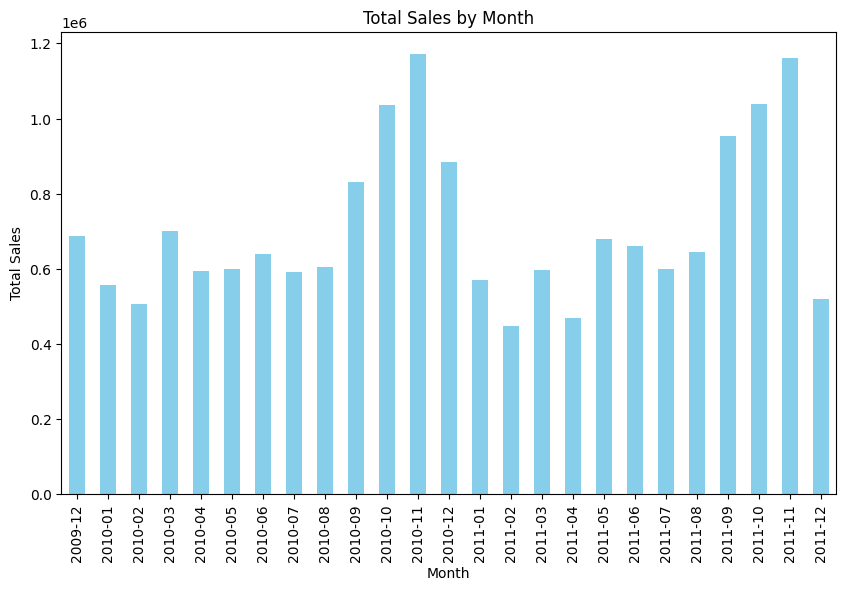

In [ ]:
# Time analysis: transactions per month
import matplotlib.pyplot as plt
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()
print(monthly_sales)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## **RFM CALCULATION**

In [ ]:
# Define a reference date for calculating recency (last date in dataset)
reference_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary (RFM)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency: days since last purchase
    'Invoice': 'nunique',                                      # Frequency: number of unique invoices
    'Price': 'sum'                                        # Monetary: total spent
}).reset_index()

# Rename columns to match RFM
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [ ]:
reference_date

Timestamp('2011-12-09 12:50:00')

Logic: Recency is calculated as the number of days since the last purchase. Here, x.max() gets the date of the most recent purchase for each customer, and (reference_date - x.max()).days calculates the number of days between the last purchase and the reference date.

Check: Ensure reference_date is correctly set as the maximum date in the dataset.

In [ ]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,207.40
1,12347.0,1,8,644.16
2,12348.0,74,5,193.10
3,12349.0,18,4,1480.44
4,12350.0,309,1,65.30


Recency: For each customer, it calculates the number of days since their most recent transaction.

Frequency: Counts the number of unique invoices for each customer (indicating how often they made purchases).

Monetary: Sums up the total revenue from each customer.

## **Calculate Product Variety (P) and Tenure (T)**

In [ ]:
# P (Product Variety): Number of unique StockCodes (products) each customer has purchased
pt = df.groupby('Customer ID').agg({
    'StockCode': 'nunique',       # P: Number of unique products
    'InvoiceDate': [              # T: Time difference between first and last purchase
        lambda x: (x.max() - x.min()).days
    ]
}).reset_index()

# Flatten column names
pt.columns = ['Customer ID', 'ProductVariety', 'Tenure']

# Preview the P and T values
pt.head()

# Merge RFM with P and T data
rfm_pt = pd.merge(rfm, pt, on='Customer ID')

,Customer ID,ProductVariety,Tenure
0,12346.0,27,400
1,12347.0,126,402
2,12348.0,25,362
3,12349.0,138,570
4,12350.0,17,0


Product Variety (P): The nunique function counts the number of unique products (using StockCode) purchased by each customer.

Tenure (T): The difference in days between the first and last purchase date for each customer, which shows how long they've been a customer.

In [ ]:
rfm_pt.head()

,Customer ID,Recency,Frequency,Monetary,ProductVariety,Tenure
0,12346.0,325,12,207.40,27,400
1,12347.0,1,8,644.16,126,402
2,12348.0,74,5,193.10,25,362
3,12349.0,18,4,1480.44,138,570
4,12350.0,309,1,65.30,17,0


In [ ]:
rfm_pt.shape

(5881, 8)

#**Standardize the Data**

Clustering algorithms like K-Means are sensitive to the scale of the variables, so we need to standardize the RFM-PT metrics.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the RFM-PT features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'Tenure']

# Standardize the data
scaler = StandardScaler()
rfm_pt_scaled = scaler.fit_transform(rfm_pt[features])

# Convert back to a DataFrame for easy interpretation
rfm_pt_scaled_df = pd.DataFrame(rfm_pt_scaled, columns=features)

# Preview the scaled data
print(rfm_pt_scaled_df.head())


    Recency  Frequency  Monetary  ProductVariety    Tenure
0  0.594598   0.439049 -0.172803       -0.471813  0.491191
1 -0.952264   0.131635  0.152768        0.378226  0.498919
2 -0.603743  -0.098925 -0.183462       -0.488986  0.344356
3 -0.871102  -0.175779  0.776151        0.481261  1.148087
4  0.518209  -0.406339 -0.278728       -0.557676 -1.054446


# **K-Means Clustering**

Next, we'll use K-Means Clustering to segment customers into different behavioral groups based on the standardized RFM-PT data. We'll use the Elbow Method to determine the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method to Determine Optimal Number of Clusters')

Text(0.5, 0, 'Number of clusters (k)')

Text(0, 0.5, 'Inertia')

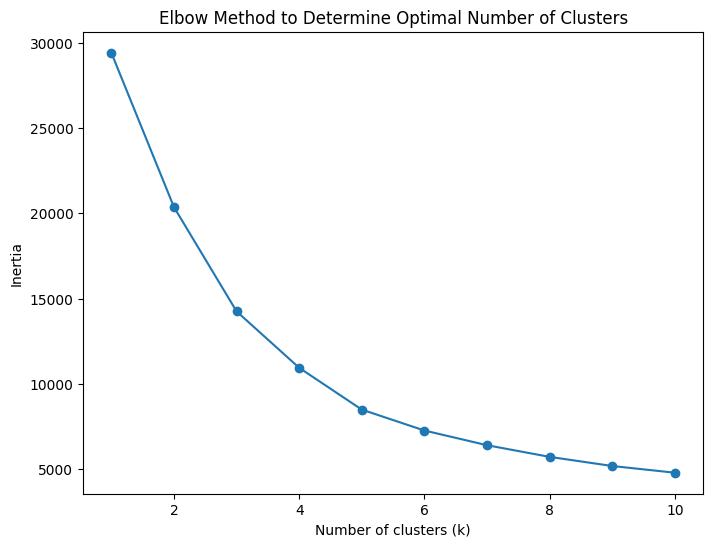

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Try k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_pt_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# **Fit K-Means Model with Optimal Clusters**

In [ ]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_pt['Cluster'] = kmeans.fit_predict(rfm_pt_scaled_df)

# Preview the clustered data
print(rfm_pt.head())


   Customer ID  Recency  Frequency  Monetary  ProductVariety  Tenure  Cluster
0      12346.0      325         12    207.40              27     400        3
1      12347.0        1          8    644.16             126     402        3
2      12348.0       74          5    193.10              25     362        3
3      12349.0       18          4   1480.44             138     570        1
4      12350.0      309          1     65.30              17       0        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Interpret Clustering Results

In [ ]:
# Group by cluster and calculate mean values for each cluster
cluster_summary = rfm_pt.groupby('Cluster').mean()

# Preview cluster characteristics
cluster_summary

,Customer ID,Recency,Frequency,Monetary,ProductVariety,Tenure
Cluster,,,,,,
0,15351.055724,460.271530,1.963019,141.395093,31.690983,60.010638
1,15340.633136,39.282051,18.688363,1387.589939,238.996055,617.413215
2,14593.100000,1.800000,199.600000,23472.635000,1407.000000,670.800000
3,15283.136316,79.939646,4.215747,229.686416,56.530350,296.080472


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'rfm_clustered' that includes 'Customer ID' and 'Cluster' columns

# Create a dictionary to map cluster numbers to segment names
cluster_labels = {
    0: 'Inactive/One-Time Buyers',
    1: 'Loyal Customers',
    2: 'VIP Customers',
    3: 'Occasional Buyers'
}

# Add a new column 'Segment' based on the cluster labels
rfm_pt['Segment'] = rfm_pt['Cluster'].map(cluster_labels)


In [ ]:
rfm_pt.head()

,Customer ID,Recency,Frequency,Monetary,ProductVariety,Tenure,Cluster,Segment
0,12346.0,325,12,207.40,27,400,3,Occasional Buyers
1,12347.0,1,8,644.16,126,402,3,Occasional Buyers
2,12348.0,74,5,193.10,25,362,3,Occasional Buyers
3,12349.0,18,4,1480.44,138,570,1,Loyal Customers
4,12350.0,309,1,65.30,17,0,0,Inactive/One-Time Buyers


In [ ]:
rfm_pt.shape

(5881, 8)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Segment', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Customers Across Segments')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Number of Customers')

([0, 1, 2, 3],
 [Text(0, 0, 'Occasional Buyers'),
  Text(1, 0, 'Loyal Customers'),
  Text(2, 0, 'Inactive/One-Time Buyers'),
  Text(3, 0, 'VIP Customers')])

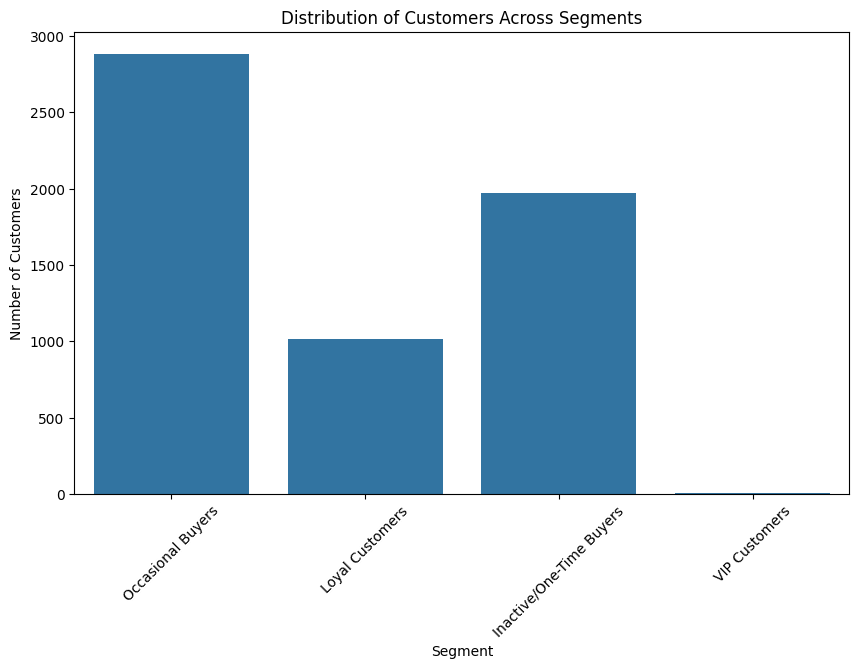

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of customers across segments
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_pt, x='Segment')
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Count the number of customers in each segment
segment_counts = rfm_pt['Segment'].value_counts().sort_index()

# Convert the counts to a DataFrame
segment_counts_df = segment_counts.reset_index()
segment_counts_df.columns = ['Segment', 'Number of Customers']

# Display the DataFrame
segment_counts_df


,Segment,Number of Customers
0,Inactive/One-Time Buyers,1974
1,Loyal Customers,1014
2,Occasional Buyers,2883
3,VIP Customers,10


<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x794414d36da0>,
 [Text(-0.9566178903365951, 0.5430305809878135, 'Inactive/One-Time Buyers'),
  Text(-0.5185849577303563, -0.9700874401907309, 'Loyal Customers'),
  Text(1.09977929648638, 0.02203404229648396, 'Occasional Buyers'),
  Text(0.005876069543255371, 1.0999843052547265, 'VIP Customers')],
 [Text(-0.5217915765472336, 0.29619849872062554, '33.6%'),
  Text(-0.2828645223983761, -0.5291386037403986, '17.2%'),
  Text(0.5998796162652981, 0.012018568525354885, '49.0%'),
  Text(0.0032051288417756564, 0.5999914392298507, '0.2%')])

(-1.0999999972227203,
 1.0999999725175513,
 -1.0999998735368657,
 1.099999993977946)

Text(0.5, 1.0, 'Customer Segments Distribution')

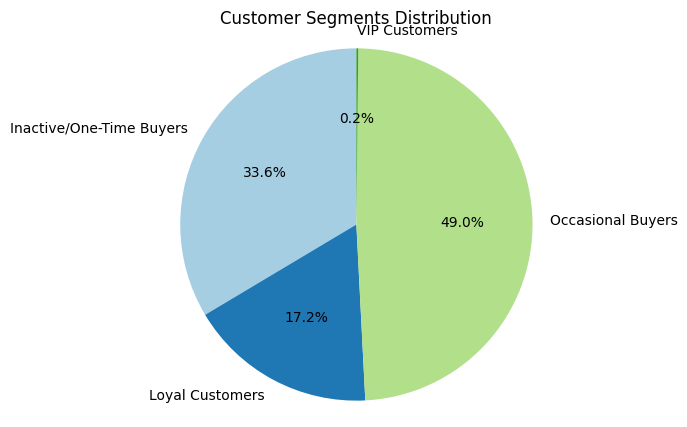

In [ ]:
# Pie chart for customer segments
plt.figure(figsize=(5, 5))
plt.pie(segment_counts_df['Number of Customers'], labels=segment_counts_df['Segment'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Customer Segments Distribution')
plt.show()


In [ ]:
segment_counts_df.sum()

,0
Segment,Inactive/One-Time BuyersLoyal CustomersOccasio...
Number of Customers,5881


,Segment,Recency,Frequency,Monetary
0,Inactive/One-Time Buyers,460.271530,1.963019,141.395093
1,Loyal Customers,39.282051,18.688363,1387.589939
2,Occasional Buyers,79.939646,4.215747,229.686416
3,VIP Customers,1.800000,199.600000,23472.635000


<Axes: xlabel='Segment', ylabel='Recency'>

Text(0.5, 1.0, 'Average Recency by Segment')

<Axes: xlabel='Segment', ylabel='Frequency'>

Text(0.5, 1.0, 'Average Frequency by Segment')

<Axes: xlabel='Segment', ylabel='Monetary'>

Text(0.5, 1.0, 'Average Monetary by Segment')

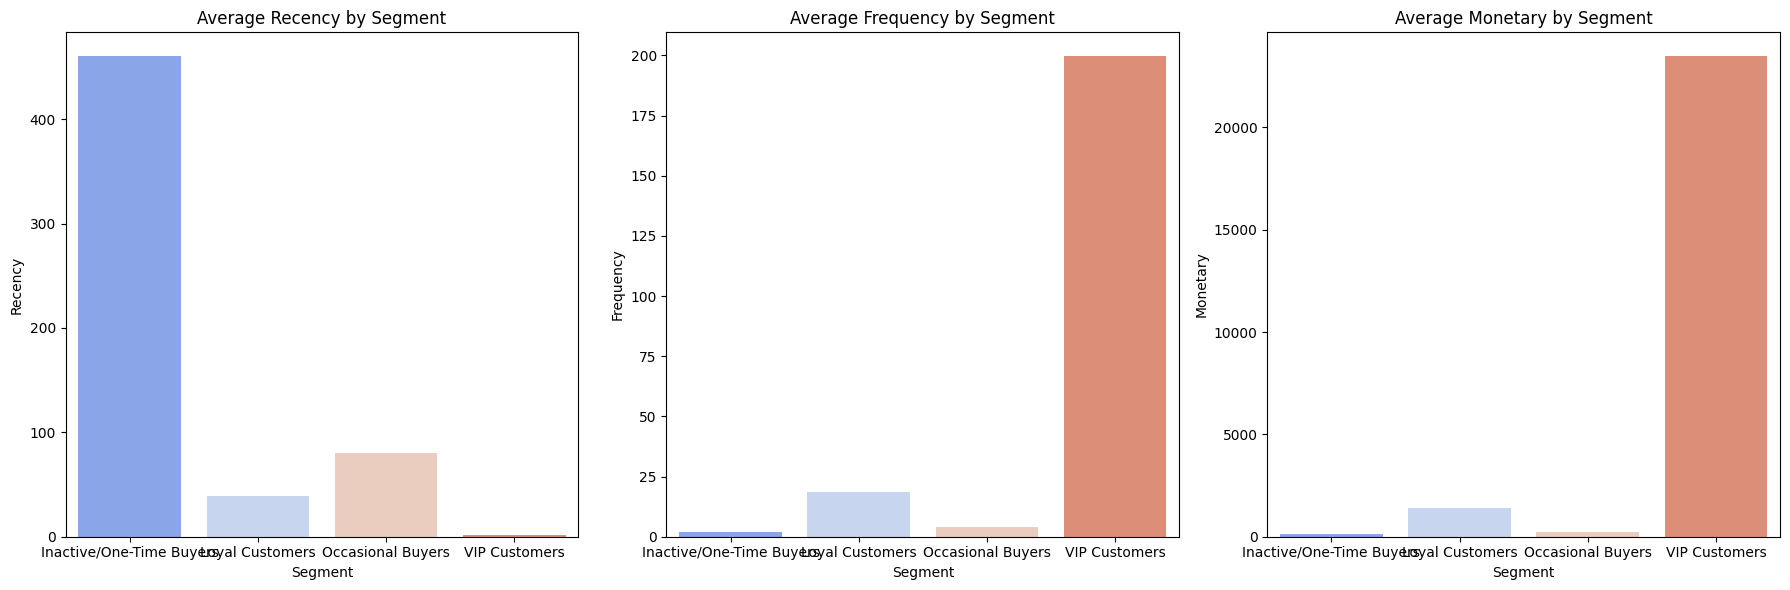

In [ ]:
# Calculate average RFM values by segment
avg_rfm_by_segment = rfm_pt.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Display the average RFM values by segment
avg_rfm_by_segment

# Visualize using bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=avg_rfm_by_segment, x='Segment', y='Recency', ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Recency by Segment')
sns.barplot(data=avg_rfm_by_segment, x='Segment', y='Frequency', ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Frequency by Segment')
sns.barplot(data=avg_rfm_by_segment, x='Segment', y='Monetary', ax=axes[2], palette='coolwarm')
axes[2].set_title('Average Monetary by Segment')
plt.tight_layout()
plt.show()


### Revenue Contribution by Segment

Here we are calculating the total revenue contributed by each customer segment. This will help us understand which segment is contributing the most to the business.

<Figure size 1000x600 with 0 Axes>

<ipython-input-53-b03ae909f5c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_segment, x='Segment', y='Monetary', palette='viridis')


<Axes: xlabel='Segment', ylabel='Monetary'>

Text(0.5, 1.0, 'Total Revenue by Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Total Revenue')

([0, 1, 2, 3],
 [Text(0, 0, 'Inactive/One-Time Buyers'),
  Text(1, 0, 'Loyal Customers'),
  Text(2, 0, 'Occasional Buyers'),
  Text(3, 0, 'VIP Customers')])

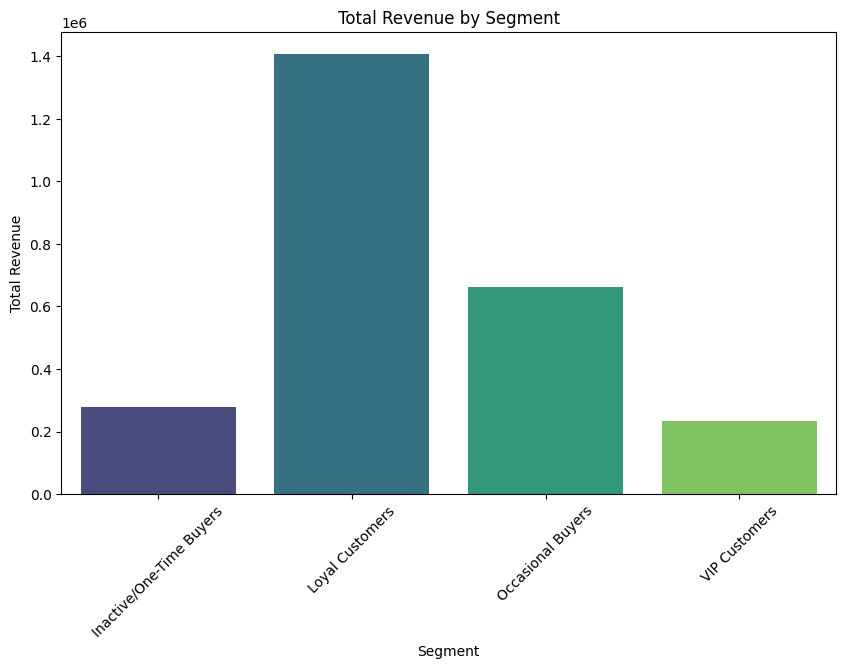

,Segment,Monetary
0,Inactive/One-Time Buyers,279113.913
1,Loyal Customers,1407016.198
2,Occasional Buyers,662185.937
3,VIP Customers,234726.350


In [ ]:
# Calculate total revenue by segment
revenue_by_segment = rfm_pt.groupby('Segment')['Monetary'].sum().reset_index()

# Plot total revenue by segment
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_segment, x='Segment', y='Monetary', palette='viridis')
plt.title('Total Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Display the revenue by segment
revenue_by_segment

2. Average Revenue per Customer by Segment
Determine the average revenue per customer in each segment.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Segment', ylabel='Monetary'>

Text(0.5, 1.0, 'Average Revenue per Customer by Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Average Revenue')

([0, 1, 2, 3],
 [Text(0, 0, 'Inactive/One-Time Buyers'),
  Text(1, 0, 'Loyal Customers'),
  Text(2, 0, 'Occasional Buyers'),
  Text(3, 0, 'VIP Customers')])

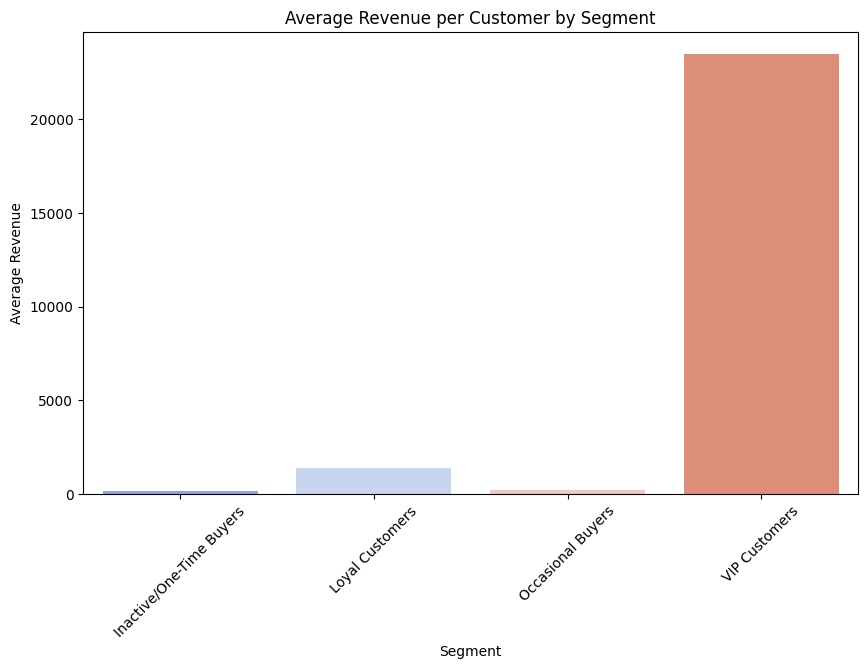

,Segment,Monetary
0,Inactive/One-Time Buyers,141.395093
1,Loyal Customers,1387.589939
2,Occasional Buyers,229.686416
3,VIP Customers,23472.635000


In [ ]:
# Calculate average revenue per customer by segment
avg_revenue_per_customer = rfm_pt.groupby('Segment')['Monetary'].mean().reset_index()

# Plot average revenue per customer by segment
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_per_customer, x='Segment', y='Monetary', palette='coolwarm')
plt.title('Average Revenue per Customer by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

# Display the average revenue per customer by segment
avg_revenue_per_customer


 Revenue Trends Over Time by Segment
Analyze how revenue from each segment changes over time, if you have a time component in your data.

In [ ]:
# Ensure 'Segment' data is in the rfm_pt DataFrame and merge with the original DataFrame
df = df.merge(rfm_pt[['Customer ID', 'Segment']], on='Customer ID', how='left')

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Monthly Revenue Trend by Segment')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Revenue')

(array([480, 492]), [Text(480, 0, 'Jan\n2010'), Text(492, 0, 'Jan\n2011')])

<Figure size 1200x800 with 0 Axes>

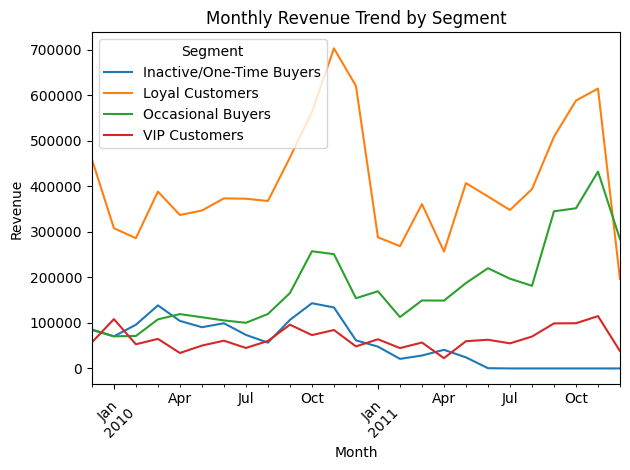

In [ ]:
# Ensure 'InvoiceDate' is a datetime object and create 'YearMonth'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly revenue for each segment
monthly_revenue_by_segment = df.groupby(['YearMonth', 'Segment'])['Revenue'].sum().unstack().fillna(0)

# Plot the revenue trend for each segment
plt.figure(figsize=(12, 8))
monthly_revenue_by_segment.plot(kind='line')
plt.title('Monthly Revenue Trend by Segment')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_revenue_by_segment.head()

Segment,Inactive/One-Time Buyers,Loyal Customers,Occasional Buyers,VIP Customers
YearMonth,,,,
2009-12,85503.260,459524.390,84433.950,57192.56
2010-01,70463.480,307956.021,70617.071,108282.49
2010-02,95995.011,286057.103,71276.492,53042.46
2010-03,138511.170,388378.511,107773.610,64945.70
2010-04,104397.462,337017.900,119308.000,33885.83


Segment-Based Purchase Frequency Analysis

Segment
Inactive/One-Time Buyers      1.963019
Loyal Customers              18.688363
Occasional Buyers             4.215747
VIP Customers               199.600000
Name: Frequency, dtype: float64


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Segment'>

Text(0.5, 1.0, 'Average Purchase Frequency by Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Average Frequency')

([0, 1, 2, 3],
 [Text(0, 0, 'Inactive/One-Time Buyers'),
  Text(1, 0, 'Loyal Customers'),
  Text(2, 0, 'Occasional Buyers'),
  Text(3, 0, 'VIP Customers')])

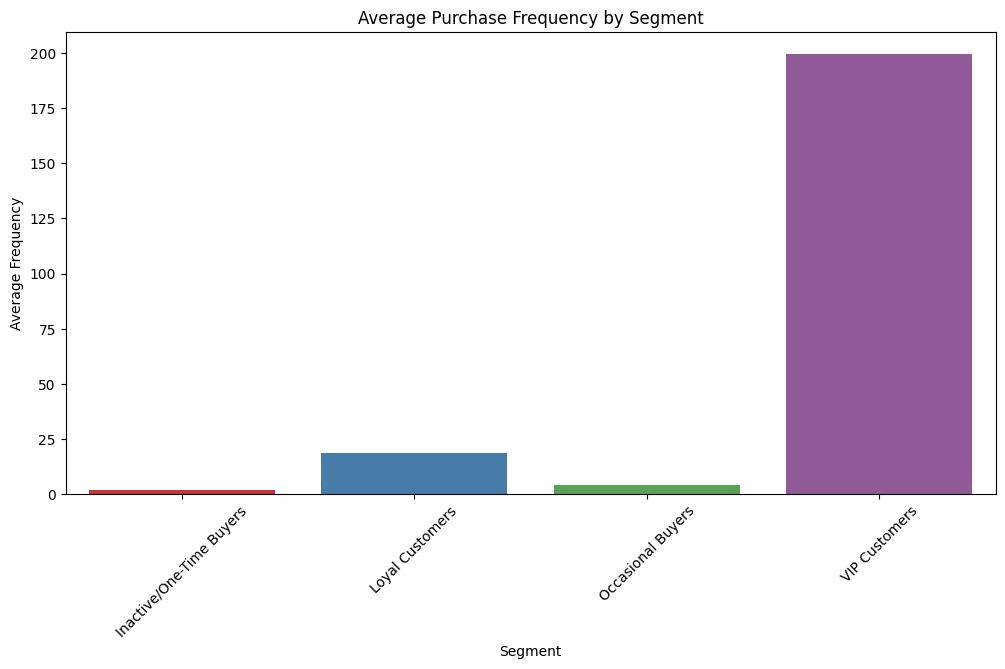

In [ ]:
frequency_by_segment = rfm_pt.groupby('Segment')['Frequency'].mean()
print(frequency_by_segment)

plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_by_segment.index, y=frequency_by_segment.values, palette='Set1')
plt.title('Average Purchase Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def calculate_revenue(df, period):
    current_date = pd.to_datetime(df['InvoiceDate'].max()) # Assign current date from df
    start_date = current_date - pd.DateOffset(months=period)
    return df[df['InvoiceDate'] >= start_date].groupby('Customer ID')['Revenue'].sum()

# Calculate revenues for each time period
lmr = calculate_revenue(df, 1)  # Last Month Revenue
tmr_3 = calculate_revenue(df, 3)  # Three Months Revenue
tmr_6 = calculate_revenue(df, 6)  # Six Months Revenue
tmr_12 = calculate_revenue(df, 12)  # Twelve Months Revenue
ltr = df.groupby('Customer ID')['Revenue'].sum()  # Lifetime Revenue

# Combine into a DataFrame
value_segments = pd.DataFrame({
    'LastMonthRevenue': lmr,
    'ThreeMonthsRevenue': tmr_3,
    'SixMonthsRevenue': tmr_6,
    'TwelveMonthsRevenue': tmr_12,
    'LifeTimeRevenue': ltr
}).reset_index()

In [ ]:
value_segments.head()

,Customer ID,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,12346.0,NaN,NaN,NaN,77183.60,77556.46
1,12347.0,224.82,1519.14,2486.57,3598.21,5633.32
2,12348.0,NaN,310.00,310.00,1797.24,2019.40
3,12349.0,1757.55,1757.55,1757.55,1757.55,4428.69
4,12350.0,NaN,NaN,NaN,334.40,334.40


In [ ]:
value_segments.isnull().sum()

,0
Customer ID,0
LastMonthRevenue,4232
ThreeMonthsRevenue,2987
SixMonthsRevenue,2392
TwelveMonthsRevenue,1611
LifeTimeRevenue,0


In [ ]:
# Example: Fill missing values with median
value_segments.fillna(value_segments.median(), inplace=True)


In [ ]:
value_segments.isnull().sum()

,0
Customer ID,0
LastMonthRevenue,0
ThreeMonthsRevenue,0
SixMonthsRevenue,0
TwelveMonthsRevenue,0
LifeTimeRevenue,0
